### ETAS: New Zealand 2016
#### 13 November 2016, m=7.8


In [1]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#
import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#
#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep
import global_etas_auto as ggep
from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy



failed while loading urllib and/or urllib. maybe python 3.x?
failed while loading urllib and/or urllib. maybe python 3.x?


/home/myoder/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# event was some time on the 24th or maybe late the 23rd. this, plus defaults, should find the event:
#to_dt = dtm.datetime(2016,8,25, tzinfo=pytz.timezone('UTC'))
to_dt = dtm.datetime.now(pytz.timezone('UTC'))
#
Lr_factor = 10.
# define these from the t_now in the actual etas object, in the event that we load it from pickle,
#  rather than calc it here.
#f_path = '/home/myoder/Dropbox/Research/etas/italy_2016_10/etas_{}'.format(to_dt)
#f_root = 'etas_2016'
#
# USGS:
lat0 = 42.934
lon0 = 13.043
t0   = dtm.datetime(2016, 10, 26, 19, 18, 8, tzinfo=pytz.timezone('UTC'))
m0   = 6.1

# newest event:
# 2016-11-13 11:02:56
t0 = dtm.datetime(2016, 11, 13, 11, 2, 56, tzinfo=pytz.timezone('UTC'))
t_ms = t0
to_dt
#Location
lat0 = -42.757
lon0 = 173.077
m0 = 7.8
d_lat=5.
d_lon=5.
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]
#to_dt = t0-dtm.timedelta(hours=2)
#to_dt = dtm.datetime.now(pytz.utc)
#
#etas = ggep.auto_etas(to_dt=to_dt, Lr_factor=Lr_factor, dt_0=5)
#italy_prams = {'do_recarray': True, 'D_fract': 1.5,
#                't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
#                't_now':to_dt, 
#                'lats': [42.,43.5], 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
#                'lons': [12.,15.], 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
#                'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76}
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt, 
               'lats': lats, 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76, 'etas_range_padding':5.}

etas = gep.ETAS_mpp(n_cpu=2*mpp.cpu_count(), **eq_prams)
#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#
f_path = '/home/myoder/Dropbox/Research/etas/nz_2016_11/etas_{}'.format(etas.t_now)
f_root = 'etas_nz_2016_11'

begin globalETAS.__init()__
Overriding t0 (etas catalog start date/time) for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2011-11-15 17:47:35.217855+00:00
fetch and process catalog.
etas_prams:  {'dmstar': 1.0, 'mc': 2.5, 'b2': 1.5, 'lats': [-47.757, -37.757], 'do_recarray': True, 'd_tau': 2.28, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<UTC>), datetime.datetime(2016, 11, 13, 17, 47, 35, 217855, tzinfo=<UTC>)], 'incat': None, 'fit_factor': 1.0, 'p': 1.1, 'lons': [168.077, 178.077], 'd_lambda': 1.76, 'b1': 1.0, 'D_fract': 1.5, 'q': 1.5}
data handle fetched...
 no file.
R:  <multiprocessing.pool.ApplyResult object at 0x7fb8d6c319e8>
R:  <multiprocessing.pool.ApplyResult object at 0x7fb8d6c31a90>
R:  <multiprocessing.pool.ApplyResult object at 0x7fb8d6c31b38>
R:  <multiprocessing.pool.ApplyResult object at 0x7fb8d6c31be0>
R:  <multiprocessing.pool.ApplyResult object at 0x7fb8d6c31c88>
R:  <multiprocessing.pool.ApplyResult object at 0x7fb8d6c3

In [4]:
#print(etas.t0, etas.t_now, etas.t_forecast, etas.catalog[-1])

ms:  (datetime.datetime(2016, 11, 7, 16, 59, 7), -39.37, 173.79, 4.8, 19.0, 736275.7077199074, 4.365158322401658, 4.3844817485799465, 0.047870819516913084, 1.3182567385564075, 0.34350982298427774, 0.5577069851169437, 1.0, 1.1, 1.5, array([  4.74741145e+08,   1.05344117e-01]), array([[ 0.95943856,  0.28191781],
       [-0.28191781,  0.95943856]]), 2.0) 173.79 -39.37


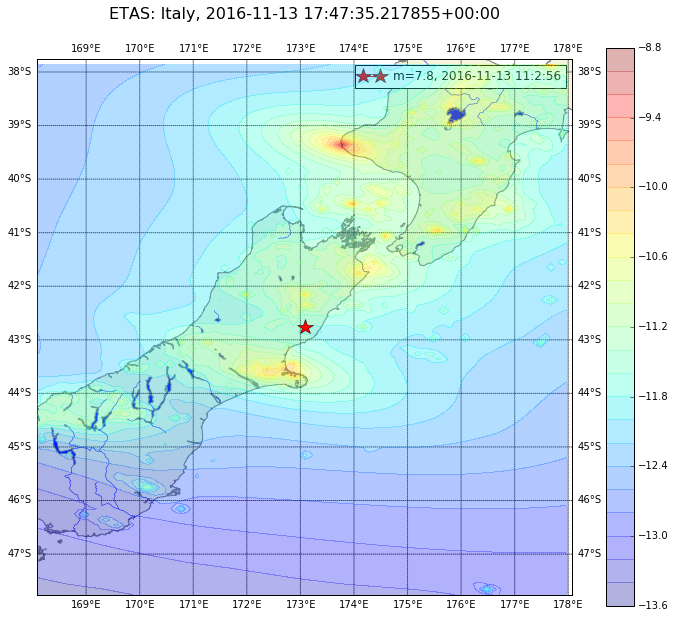

In [10]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)
#
#mainshock = sorted(etas.catalog, key=lambda rw: rw['mag'])[-1]
#print('mainshock: ', mainshock)
# get mainshock. it's an m>6 event in the last week or so... this is subjective.
# if we just look for the biggest event, we get the L'Aquila event, so we'll need to be more creative...
# or just specify it.

mainshock = etas.catalog[-1]
for j,eq in enumerate(reversed(etas.catalog)):
    #print('*** ', pytz.utc.localize(eq['event_date'].astype(dtm.datetime)))
    if pytz.utc.localize(eq['event_date'].astype(dtm.datetime))<etas.t_now-dtm.timedelta(days=180): break
    if eq['mag']>mainshock['mag']:
        mainshock = eq
        #
    #
#
print('ms: ', mainshock, mainshock['lon'], mainshock['lat'])
x,y = etas.cm(mainshock['lon'], mainshock['lat'])
#
#print('mm: ', max(etas.catalog['mag']))
#
# let's get everything m>6 in the last 6 months?
m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5 
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=180)]
#
# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
dt=t0
dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
#etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, {}'.format(mainshock['mag'], dt_str))
etas.cm.plot([lon0], [lat0], latlon=False, marker='*', color='r', ms=16, zorder=11,
                   label='m={}, {}'.format(m0, dt_str))

ax.set_title('ETAS: Italy, {}\n\n'.format(etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={}, {}'.format(m6['mag'], dt_str))
    #
plt.gca().legend()

In [11]:
print(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5])
len(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5
     and rw['event_date'].astype(dtm.datetime)>dtm.datetime(2016,10,20)])



['1990-02-09T21:27:41.280000-0600,6.0\n', '1990-02-18T23:34:37.040000-0600,5.9\n', '1990-05-12T23:23:09.600000-0500,6.3\n', '1990-10-04T18:48:31.380000-0500,5.5\n', '1990-10-05T21:41:15.430000-0500,5.7\n', '1991-01-28T06:58:48.730000-0600,5.9\n', '1991-01-28T12:00:53.780000-0600,5.6\n', '1991-02-15T04:48:11.520000-0600,5.5\n', '1991-09-08T08:50:30.870000-0500,5.6\n', '1992-03-30T01:02:51.990000-0600,5.7\n', '1992-05-27T17:30:35.230000-0500,5.8\n', '1993-04-11T01:59:48.100000-0500,5.5\n', '1993-08-10T04:46:35.350000-0500,6.0\n', '1994-06-17T22:25:15.830000-0500,7.1\n', '1994-06-19T08:43:51.190000-0500,5.9\n', '1995-03-22T13:43:30.010000-0600,5.8\n', '1995-09-19T17:52:23.140000-0500,5.8\n', '1995-11-24T00:18:56.470000-0600,6.2\n', '1999-05-18T04:19:34.060000-0500,5.8\n', '1999-10-25T15:31:42.310000-0500,6.2\n', '2001-05-24T13:07:55.440000-0500,5.5\n', '2001-10-14T22:49:37.980000-0500,5.5\n', '2001-12-07T13:27:34.140000-0600,5.8\n', '2002-05-04T07:59:54.010000-0500,5.5\n', '2004-07-17T23:

0

In [13]:
## hey, pickling works with the new ETAS objects (or at least it appears to...):
# with open('data/etas_201610.pkl', 'wb') as fpkl:
#     pickle.dump( etas, fpkl)    
#
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas2 = pickle.load(fin)
#
#print(etas2.catalog[0:5])
# TODO: we want the datetime part of the filename to come from the etas object itself, for purposes of
# integrity. BUT, we want this script to be a bit more portable, so we should replace all the etas
# references/object name to just 'etas'
#
etas.export_kml(os.path.join(f_path, '{}_{}.kml'.format(f_root, str(etas.t_now).replace(' ', '_'))))
etas.export_xyz(os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_'))))
fg.savefig(os.path.join(f_path, '{}_{}.png'.format(f_root, str(etas.t_now).replace(' ', '_'))))
#
# so this worked, once upon a time, but breaks maybe when the script does not run cleanly all the way through?
#with open (os.path.join(f_path, '{}_{}.pkl'.format(f_root, str(etas.t_now).replace(' ', '_'))), 'wb') as fpkl:
#    pickle.dump(etas, fpkl)


kml bottom, top:  0 24


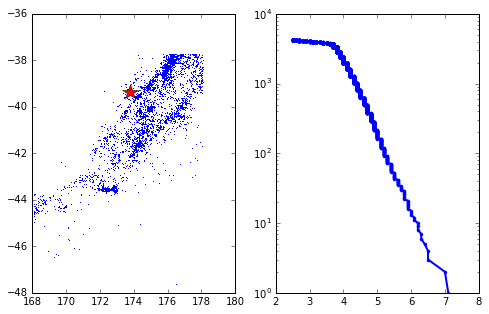

In [14]:
plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(etas.catalog['lon'], etas.catalog['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(etas.catalog['mag']))], numpy.arange(1,len(etas.catalog)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [15]:
#print(etas.mc, etas.mc_etas)

In [16]:
# plot a cross-section of ETAS. let's get smart about this and do a PCA on the xyz field...
#
#plt.figure()
##my_xy = [[x,y,z] for x,y in zip(etas.catalog['lon'], etas['lat']) if x>=42.25 and x<=42.75]
#my_xyz = [[x,y,z] for x,y,z in etas.ETAS_array if y>=42.25 and y<=42.75]
#plt.figure(figsize=(8,6))
#plt.plot([x for x,y,z in my_xyz ], [z for x,y,z in my_xyz], '.')

In [17]:
mycat = atp.catfromANSS(lon=lons, lat=lats, minMag=2.5,
                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)


data handle fetched...
 no file.


In [19]:
print(mycat.dtype)

(numpy.record, [('event_date', '<M8[us]'), ('lat', '<f8'), ('lon', '<f8'), ('mag', '<f8'), ('depth', '<f8'), ('event_date_float', '<f8')])
